In [1]:
import scipy.io
import numpy as np
import random
import keras

In [2]:
#Just to do reshape in 3 dimension without corrupting the data
def reshape(array, size = (100000, 2, 256)):
    new = np.zeros(size)
    for i in range(array.shape[2]):
        example = array[:, :, i]
        new[i, 0, :] = example[:, 0]
        new[i, 1, :] = example[:, 1]
    return new

In [3]:
mat = scipy.io.loadmat("Data1.mat")
new_array = mat["Dataset"]
new_array = np.array(new_array)
raw_data = new_array
# raw_data

In [4]:
#Creating the labels for the data
mods = ["BPSK", "QPSK", "16QAM", "64QAM", "256QAM"]
n_examples = 20000
y1 = ["BPSK"]*n_examples
y2 = ["QPSK"]*n_examples
y3 = ["16QAM"]*n_examples
y4 = ["64QAM"]*n_examples
y5 = ["256QAM"]*n_examples

y_raw = y1+y2+y3+y4+y5
y_raw = np.array(y_raw)

y = np.zeros((len(y_raw), len(mods)))
for i in range(len(y_raw)):
    if y_raw[i] == "BPSK":
        y[i, :] = np.array([1, 0, 0, 0, 0])
    elif y_raw[i] == "QPSK":
        y[i, :] = np.array([0, 1, 0, 0, 0])
    elif y_raw[i] == "16QAM":
        y[i, :] = np.array([0, 0, 1, 0, 0])
    elif y_raw[i] == "64QAM":
        y[i, :] = np.array([0, 0, 0, 1, 0])
    elif y_raw[i] == "256QAM":
        y[i, :] = np.array([0, 0, 0, 0, 1])
        
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

[1. 0. 0. 0. 0.]


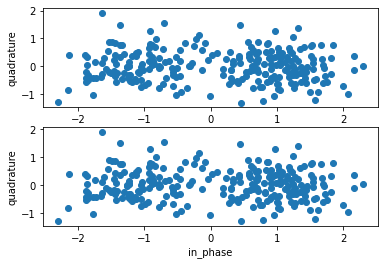

In [5]:
#Reshaping the data to be similar to literature
X = reshape(raw_data, (len(mods)*n_examples, 2, 256))

#Just to plot before and after the reshape to ensure the data is not corrupted
a = 4000
signal = X[a, :, :]

in_phase = signal[0, :]
quadrature = signal[1, :]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(211)

ax.set_xlabel("in_phase")
ax.set_ylabel("quadrature")
    
ax.scatter(in_phase, quadrature)

signal = raw_data[:, :, a]

in_phase = signal[:, 0]
quadrature = signal[:, 1]

ax1 = fig.add_subplot(212)

ax1.set_xlabel("in_phase")
ax1.set_ylabel("quadrature")
    
ax1.scatter(in_phase, quadrature)

#Print the label
print(y[a])

In [6]:
np.random.seed(2023)
random.seed(2023)
train_split = 0.7
valid_split = 0.15
test_split = 0.15

n_examples = X.shape[0] #total number of examples
n_train = int(n_examples * train_split) #number of examples for training
n_valid = int(n_examples * valid_split) #number of examples for validation
n_test = int(n_examples * test_split) #number of examples for testing
    
# Get indexes of train data
train_idx = np.random.choice(range(0, n_examples), size=n_train, replace=False)

# Left indexes for valid and test sets
left_idx= list(set(range(0, n_examples)) - set(train_idx))
    
# Get indexes for the left indexes of the X data
val = np.random.choice(range(0, (n_valid+n_test)), size=(n_valid), replace=False)
test = list(set(range(0, len(left_idx))) - set(val))

# Assign indeces for validation to left indexes
valid_idx = []
for i in val:
    val_idx = left_idx[i]
    valid_idx.append(val_idx)
    
# Get the test set as the rest indexes
test_idx = []
for i in test:
    tst_idx = left_idx[i]
    test_idx.append(tst_idx)
    
# Shuffle the valid_idx and test_idx
random.shuffle(valid_idx)
random.shuffle(test_idx)


# Assing the indexes to the X and Y data to create train and test sets
X_train = X[train_idx]
X_val = X[valid_idx]
X_test = X[test_idx]   
y_train = y[train_idx]
y_val = y[valid_idx]
y_test = y[test_idx]  

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(70000, 2, 256) (15000, 2, 256) (15000, 2, 256)
(70000, 5) (15000, 5) (15000, 5)


C:\Users\abdrk\AppData\Local\Temp\ipykernel_24500\1921242298.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


array([0., 0., 0., 0., 1.])

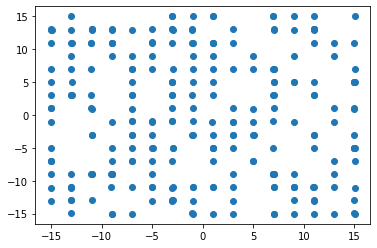

In [17]:
#To visualize some data
import matplotlib.pyplot as plt
n = 550
signal = X_train[n]
label = y_train[n]
in_phase = signal[0]
quadrature = signal[1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(in_phase, quadrature)
# plt.savefig("16PSK", facecolor='w', bbox_inches="tight",
#             pad_inches=0.3, transparent=True)
fig.show()
label

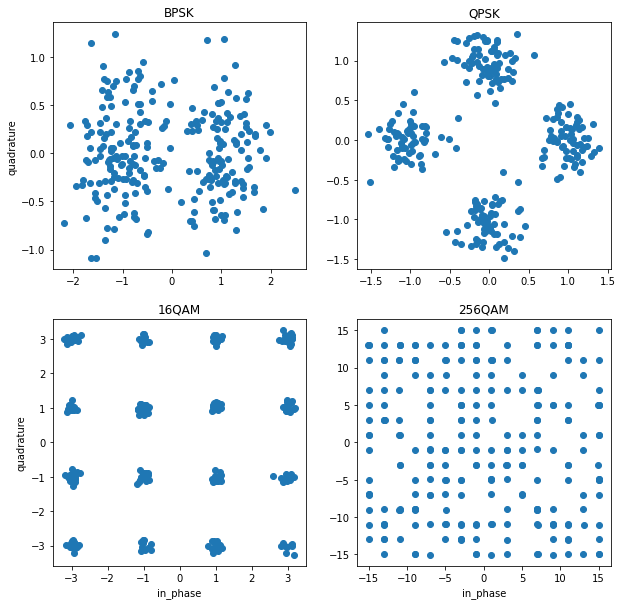

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
signal = X_train[500]
label = y_train[500]
in_phase = signal[0]
quadrature = signal[1]
ax.set_ylabel("quadrature")
ax.set_title("BPSK")
ax.scatter(in_phase, quadrature)

ax1 = fig.add_subplot(222)
signal = X_train[590]
label = y_train[590]
in_phase = signal[0]
quadrature = signal[1]
ax1.set_title("QPSK")
ax1.scatter(in_phase, quadrature)

ax2 = fig.add_subplot(223)
signal = X_train[570]
label = y_train[570]
in_phase = signal[0]
quadrature = signal[1]
ax2.set_xlabel("in_phase")
ax2.set_ylabel("quadrature")
ax2.set_title("16QAM")
ax2.scatter(in_phase, quadrature)

ax3 = fig.add_subplot(224)
signal = X_train[550]
label = y_train[550]
in_phase = signal[0]
quadrature = signal[1]
ax3.set_xlabel("in_phase")
ax3.set_title("256QAM")
ax3.scatter(in_phase, quadrature)
plt.savefig("Examples", facecolor='w', bbox_inches="tight",
             pad_inches=0.3, transparent=True)

In [31]:
import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
import math
import numpy as np
import matplotlib.pyplot as plt
import random, sys, keras
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *


In [32]:
in_shp = list(X_train.shape[1:])
classes = mods

nb_epoch = 100     # number of epochs to train on
batch_size = 32  # training batch size
dr = 0.5 # dropout rate (%)


model_CNN = models.Sequential()
model_CNN.add(Reshape(in_shp+[1], input_shape=in_shp))
model_CNN.add(ZeroPadding2D((0,2)))
model_CNN.add(Conv2D(2, (1,4), activation="relu"))
model_CNN.add(Dropout(dr))
model_CNN.add(ZeroPadding2D((0,2)))
model_CNN.add(Conv2D(4, (2,4), activation="relu"))
model_CNN.add(Dropout(dr))
model_CNN.add(Flatten())
model_CNN.add(Dense(16, activation='relu'))
model_CNN.add(Dropout(dr))
model_CNN.add(Dense(len(classes), activation='softmax'))
model_CNN.add(Reshape([len(classes)]))
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 256, 1)         0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 2, 260, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 2, 257, 2)         10        
                                                                 
 dropout (Dropout)           (None, 2, 257, 2)         0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 2, 261, 2)        0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 258, 4)         6

In [33]:
filepath = 'weight_3layers_CNN.wts.h5'
history_CNN = model_CNN.fit(X_train,
    y_train,
    batch_size=batch_size,
    epochs =nb_epoch,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])


Epoch 1/100
2188/2188 [==============================] - 14s 6ms/step - loss: 0.9233 - accuracy: 0.5340 - val_loss: 0.4699 - val_accuracy: 0.8050
Epoch 2/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.5963 - accuracy: 0.7067 - val_loss: 0.3508 - val_accuracy: 0.8033
Epoch 3/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.3810 - accuracy: 0.8237 - val_loss: 0.1121 - val_accuracy: 0.9859
Epoch 4/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.2262 - accuracy: 0.9009 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 5/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1768 - accuracy: 0.9134 - val_loss: 0.0329 - val_accuracy: 0.9997
Epoch 6/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1677 - accuracy: 0.9094 - val_loss: 0.0415 - val_accuracy: 0.9999
Epoch 7/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1616 - accuracy: 0.9212 - val_loss: 0.0321 -

In [34]:
# Re-load the best weights once training is finished
model_CNN.load_weights('weight_3layers_CNN.wts.h5')


# Show simple version of performance
score = model_CNN.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
print("Test Loss and Accuracy: ",score)

Test Loss and Accuracy:  [0.028890229761600494, 0.9993333220481873]


In [35]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

469/469 [==============================] - 1s 2ms/step


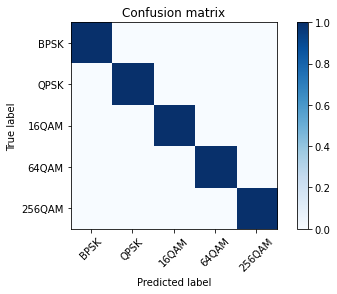

In [36]:
test_Y_hat_CNN = model_CNN.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_CNN[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [37]:
#CNN-LSTM model
layer_in = keras.layers.Input(shape=(2,256))
layer_reshape = keras.layers.Reshape((256, 2))(layer_in)
layer = keras.layers.Conv1D(filters=16, kernel_size=8, activation='relu')(layer_reshape)
layer = keras.layers.MaxPool1D(pool_size=2)(layer)
layer = keras.layers.LSTM(16, return_sequences=True,)(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(len(mods), activation='softmax')(layer)

model_cldnn = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cldnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, patience=5, min_lr=0.00001),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, verbose=1)]

model_cldnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
model_cldnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 256)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 256, 2)            0         
                                                                 
 conv1d (Conv1D)             (None, 249, 16)           272       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 16)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 124, 16)           2112      
                                                                 
 dropout_3 (Dropout)         (None, 124, 16)           0         
                                                             

In [39]:
tf.keras.backend.clear_session()
filepath = 'cldnn_model.h5'
history_cldnn = model_cldnn.fit(X_train,
    y_train,
    batch_size=batch_size,
    epochs =nb_epoch,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks = callbacks)


Epoch 1/100
2188/2188 [==============================] - 84s 37ms/step - loss: 0.0222 - accuracy: 0.9921 - val_loss: 1.1467e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/100
2188/2188 [==============================] - 81s 37ms/step - loss: 2.0573e-04 - accuracy: 1.0000 - val_loss: 8.8193e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/100
2188/2188 [==============================] - 80s 37ms/step - loss: 1.7305e-05 - accuracy: 1.0000 - val_loss: 3.4857e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/100
2188/2188 [==============================] - 81s 37ms/step - loss: 7.1978e-04 - accuracy: 0.9998 - val_loss: 2.6510e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/100
2188/2188 [==============================] - 80s 37ms/step - loss: 1.7696e-04 - accuracy: 1.0000 - val_loss: 2.8488e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/100
2188/2188 [==============================] - 78s 36ms/step - loss: 8.2992e-07 - accuracy: 1.0000 - val_loss: 7.5036e-08 - val_accuracy: 1.0000 - lr: 0.0

In [40]:
# Re-load the best weights once training is finished
model_cldnn.load_weights('cldnn_model.h5')


# Show simple version of performance
score = model_cldnn.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
print("Test Loss and Accuracy: ",score)

Test Loss and Accuracy:  [2.4636578888070915e-10, 1.0]


469/469 [==============================] - 5s 10ms/step


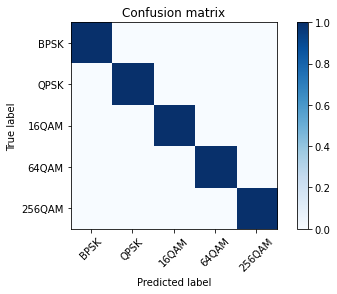

In [41]:
test_Y_hat_cldnn = model_cldnn.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_cldnn[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [42]:
layer_in = keras.layers.Input(shape=(2,256))
layer_reshape = keras.layers.Reshape((256, 2))(layer_in)
layer = keras.layers.Conv1D(filters=16, kernel_size=(4), activation='relu')(layer_reshape)
layer = keras.layers.MaxPool1D(pool_size=(2))(layer)
layer = keras.layers.GRU(16, return_sequences=True)(layer)
layer = keras.layers.GaussianDropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(len(mods), activation='softmax')(layer)

model_CGDNN = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cgdnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, patience=4, min_lr=0.00001),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_CGDNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [43]:
model_CGDNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 256)]          0         
                                                                 
 reshape (Reshape)           (None, 256, 2)            0         
                                                                 
 conv1d (Conv1D)             (None, 253, 16)           144       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 16)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 126, 16)           1632      
                                                                 
 gaussian_dropout (GaussianD  (None, 126, 16)          0         
 ropout)                                                     

In [44]:
tf.keras.backend.clear_session()
filepath = 'cgdnn_model.h5'
history_CGDNN = model_CGDNN.fit(X_train,
    y_train,
    batch_size=batch_size,
    epochs =nb_epoch,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks = callbacks)


Epoch 1/100
2188/2188 [==============================] - 95s 42ms/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 1.1104e-05 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 2/100
2188/2188 [==============================] - 89s 41ms/step - loss: 1.0004e-05 - accuracy: 1.0000 - val_loss: 2.5106e-06 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 3/100
2188/2188 [==============================] - 90s 41ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 7.4921e-06 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 4/100
2188/2188 [==============================] - 85s 39ms/step - loss: 1.2818e-05 - accuracy: 1.0000 - val_loss: 1.6122e-06 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 5/100
2188/2188 [==============================] - 85s 39ms/step - loss: 3.3551e-06 - accuracy: 1.0000 - val_loss: 7.1902e-07 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 6/100
2188/2188 [==============================] - 86s 39ms/step - loss: 1.8199e-06 - accuracy: 1.0000 - val_loss: 4.5907e-07 - val_accuracy: 1.0000 - lr: 8.0000e

2188/2188 [==============================] - 83s 38ms/step - loss: 2.7929e-10 - accuracy: 1.0000 - val_loss: 1.2716e-10 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 49/100
2188/2188 [==============================] - 83s 38ms/step - loss: 5.4155e-10 - accuracy: 1.0000 - val_loss: 1.1921e-10 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 50/100
2188/2188 [==============================] - 83s 38ms/step - loss: 5.2111e-10 - accuracy: 1.0000 - val_loss: 1.3510e-10 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 51/100
2188/2188 [==============================] - 83s 38ms/step - loss: 4.5129e-10 - accuracy: 1.0000 - val_loss: 1.3510e-10 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 52/100
2188/2188 [==============================] - 83s 38ms/step - loss: 4.8194e-10 - accuracy: 1.0000 - val_loss: 1.3510e-10 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 53/100
2188/2188 [==============================] - 83s 38ms/step - loss: 4.7854e-10 - accuracy: 1.0000 - val_loss: 1.3510e-10 - val_accuracy:

In [45]:
# Re-load the best weights once training is finished
model_CGDNN.load_weights('cgdnn_model.h5')


# Show simple version of performance
score = model_CGDNN.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
print("Test Loss and Accuracy: ",score)

Test Loss and Accuracy:  [1.1126198573574442e-10, 1.0]


469/469 [==============================] - 6s 8ms/step


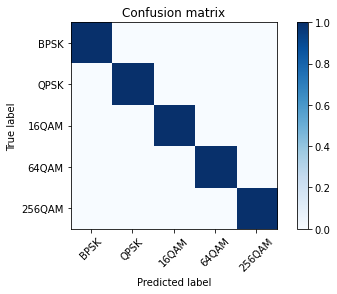

In [46]:
test_Y_hat_CGDNN = model_CGDNN.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_CGDNN[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [47]:
def position_encoding_init(n_position, emb_dim):
    ''' Init the sinusoid position encoding table '''

    # keep dim 0 for padding token position encoding zero vector
    position_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / emb_dim) for j in range(emb_dim)]
        if pos != 0 else np.zeros(emb_dim) for pos in range(n_position)])
    

    position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2]) # dim 2i
    position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2]) # dim 2i+1
    
    return position_enc

In [48]:
# Transformer Block
from keras import layers
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
    def get_config(self):
        config = super().get_config()
        return config
    
    

In [49]:
embed_dim = 16  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 16  # Hidden layer size in feed forward network inside transformer

inputs = keras.layers.Input(shape=(2,256))
reshape = keras.layers.Reshape((256, 2))(inputs)
x = keras.layers.Conv1D(filters=embed_dim, kernel_size=8, activation='relu')(reshape)
x = keras.layers.MaxPool1D(pool_size=2)(x)
x = keras.layers.LSTM(embed_dim, return_sequences=True,)(x)
x = keras.layers.Dropout(0.4)(x)

pos_emb = position_encoding_init(124,16)
x_pos = x+pos_emb

transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x_pos)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(mods), activation="softmax")(x)

model_MCT = keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model_MCT.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 256)]          0         
                                                                 
 reshape (Reshape)           (None, 256, 2)            0         
                                                                 
 conv1d (Conv1D)             (None, 249, 16)           272       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 16)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 124, 16)           2112      
                                                                 
 dropout (Dropout)           (None, 124, 16)           0         
                                                             

In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.03)
model_MCT.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [52]:
filepath = 'MCT_model.h5'
history_MCT = model_MCT.fit(X_train, y_train, batch_size=32, epochs=100, validation_data= (X_val, y_val), 
                           callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])

Epoch 1/100
2188/2188 [==============================] - 186s 83ms/step - loss: 0.1762 - accuracy: 0.9321 - val_loss: 5.5946e-04 - val_accuracy: 0.9999
Epoch 2/100
2188/2188 [==============================] - 182s 83ms/step - loss: 0.0211 - accuracy: 0.9943 - val_loss: 8.4481e-05 - val_accuracy: 1.0000
Epoch 3/100
2188/2188 [==============================] - 181s 83ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 5.0283e-05 - val_accuracy: 1.0000
Epoch 4/100
2188/2188 [==============================] - 179s 82ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 5.7863e-06 - val_accuracy: 1.0000
Epoch 5/100
2188/2188 [==============================] - 179s 82ms/step - loss: 0.0705 - accuracy: 0.9661 - val_loss: 2.0029e-04 - val_accuracy: 1.0000
Epoch 6/100
2188/2188 [==============================] - 178s 81ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 7.4806e-05 - val_accuracy: 1.0000
Epoch 7/100
2188/2188 [==============================] - 178s 81ms/step - loss: 0.0027 -

In [53]:
# Re-load the best weights once training is finished
model_MCT.load_weights('MCT_model.h5')


# Show simple version of performance
score = model_MCT.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
print("Test Loss and Accuracy: ",score)

Test Loss and Accuracy:  [6.357790738320546e-08, 1.0]


469/469 [==============================] - 13s 26ms/step


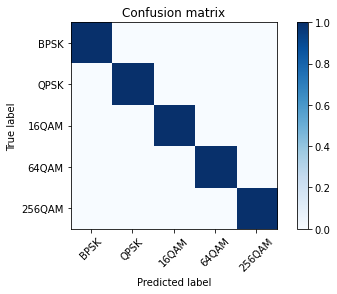

In [54]:
test_Y_hat_MCT = model_MCT.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat_MCT[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

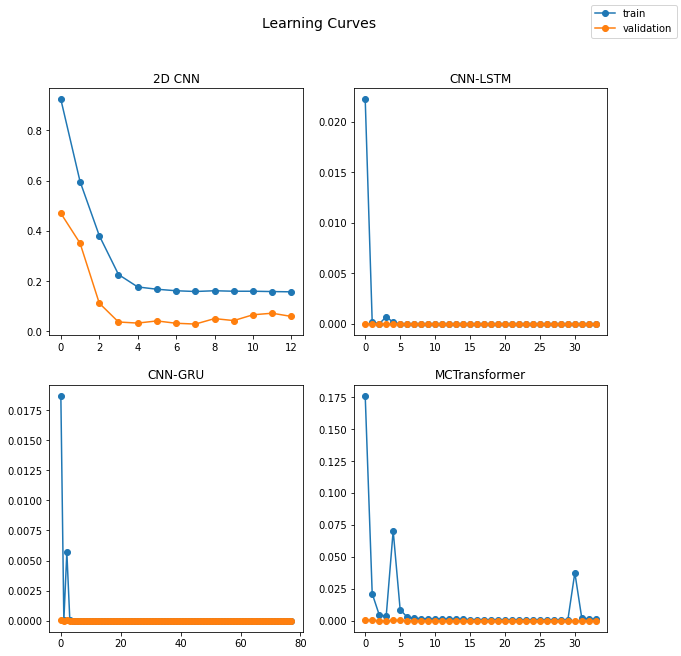

In [55]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Learning Curves', fontsize = 14)


axs[0, 0].plot(history_CNN.history['loss'], "o-")
axs[0, 0].plot(history_CNN.history['val_loss'], "o-")
axs[0, 0].set_title('2D CNN')

axs[0, 1].plot(history_cldnn.history['loss'], "o-")
axs[0, 1].plot(history_cldnn.history['val_loss'], "o-")
axs[0, 1].set_title('CNN-LSTM')

axs[1, 0].plot(history_CGDNN.history['loss'], "o-")
axs[1, 0].plot(history_CGDNN.history['val_loss'], "o-")
axs[1, 0].set_title('CNN-GRU')

axs[1, 1].plot(history_MCT.history['loss'], "o-")
axs[1, 1].plot(history_MCT.history['val_loss'], "o-")
axs[1, 1].set_title('MCTransformer')



fig.legend(['train', 'validation'], loc='upper right', prop={'size': 10})
plt.show()
